***Prog - 6***

[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
17/17 [==============================] - 4s 40ms/step - loss: 0.0820
Epoch 2/10
17/17 [==============================] - 1s 41ms/step - loss: 0.0074
Epoch 3/10
17/17 [==============================] - 1s 41ms/step - loss: 0.0037
Epoch 4/10
17/17 [==============================] - 1s 40ms/step - loss: 0.0025
Epoch 5/10
17/17 [==============================] - 1s 41ms/step - loss: 0.0021
Epoch 6/10
17/17 [==============================] - 1s 42ms/step - loss: 0.0020
Epoch 7/10
17/17 [==============================] - 1s 64ms/step - loss: 0.0020
Epoch 8/10
17/17 [==============================] - 1s 67ms/step - loss: 0.0019
Epoch 9/10
17/17 [==============================] - 1s 72ms/step - loss: 0.0019
Epoch 10/10
3/3 [==============================] - 1s 16ms/step


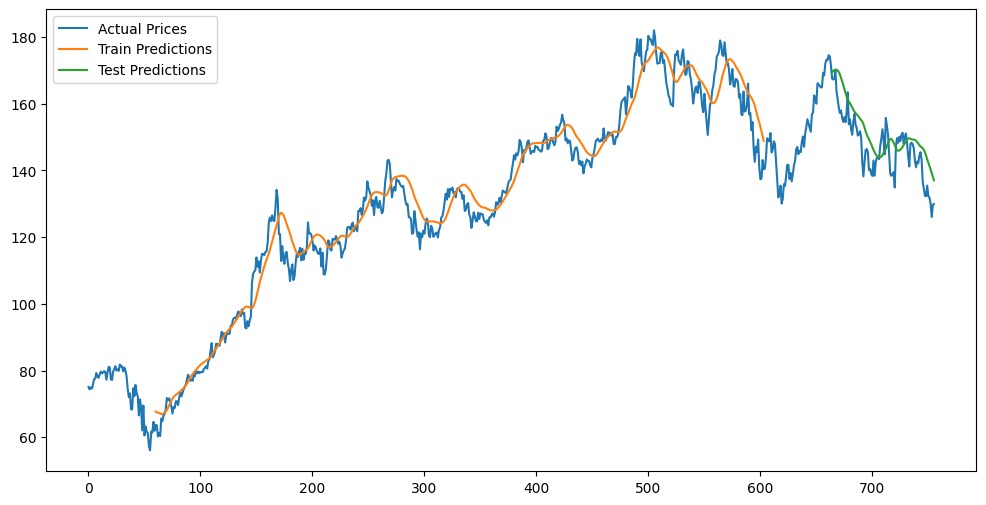

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X).reshape(-1, time_step, 1), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

model = Sequential([LSTM(50, return_sequences=True, input_shape=(60, 1)), LSTM(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
actual_prices = scaler.inverse_transform(data)

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(60, 60 + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(60 + len(train_predict) + 60, 60 + len(train_predict) + 60 + len(test_predict)), test_predict, label='Test Predictions')
plt.legend()
plt.show()

**Prog - 7**

[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
17/17 [==============================] - 4s 40ms/step - loss: 0.1171
Epoch 2/10
17/17 [==============================] - 1s 39ms/step - loss: 0.0108
Epoch 3/10
17/17 [==============================] - 1s 39ms/step - loss: 0.0048
Epoch 4/10
17/17 [==============================] - 1s 40ms/step - loss: 0.0028
Epoch 5/10
17/17 [==============================] - 1s 49ms/step - loss: 0.0017
Epoch 6/10
17/17 [==============================] - 1s 65ms/step - loss: 0.0011
Epoch 7/10
17/17 [==============================] - 1s 68ms/step - loss: 9.5359e-04
Epoch 8/10
17/17 [==============================] - 1s 68ms/step - loss: 8.6546e-04
Epoch 9/10
17/17 [==============================] - 1s 47ms/step - loss: 8.3385e-04
Epoch 10/10
3/3 [==============================] - 1s 19ms/step


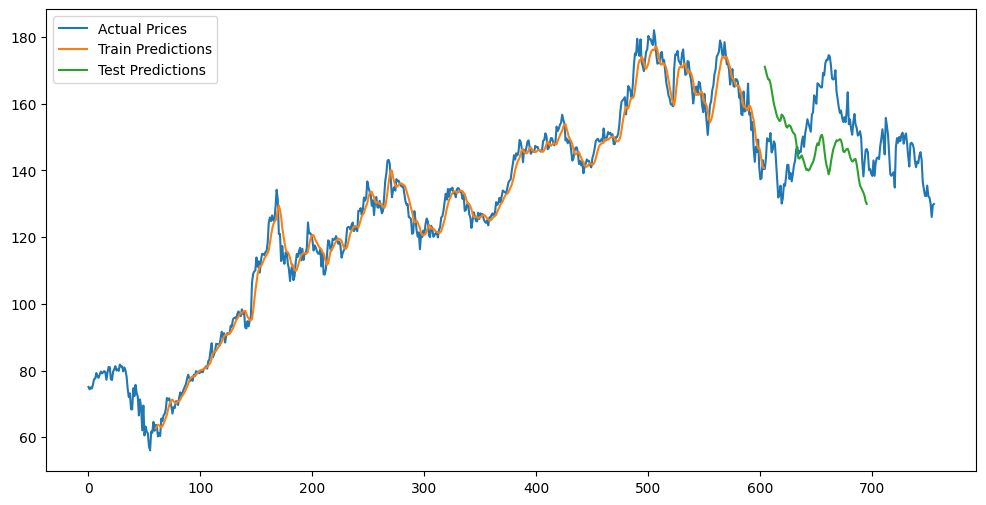

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X).reshape(-1, time_step, 1), np.array(y)

X_train, y_train = create_dataset(train_data)
X_test, y_test = create_dataset(test_data)

model = Sequential([GRU(50, return_sequences=True, input_shape=(60, 1)), GRU(50), Dense(1)])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

train_predict = scaler.inverse_transform(model.predict(X_train))
test_predict = scaler.inverse_transform(model.predict(X_test))
actual_prices = scaler.inverse_transform(data)

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(range(60, 60 + len(train_predict)), train_predict, label='Train Predictions')
plt.plot(range(60 + len(train_predict), 60 + len(train_predict) + len(test_predict)), test_predict, label='Test Predictions')
plt.legend()
plt.show()

**Prog-8**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 66s 34ms/step - loss: 0.1404 - accuracy: 0.9569 - val_loss: 0.0473 - val_accuracy: 0.9847
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0301 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0328 - val_accuracy: 0.9889
Epoch 4/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0341 - val_accuracy: 0.9885
Epoch 5/5
313/313 [==============================] - 3s 8ms/step
Predictions with Images:


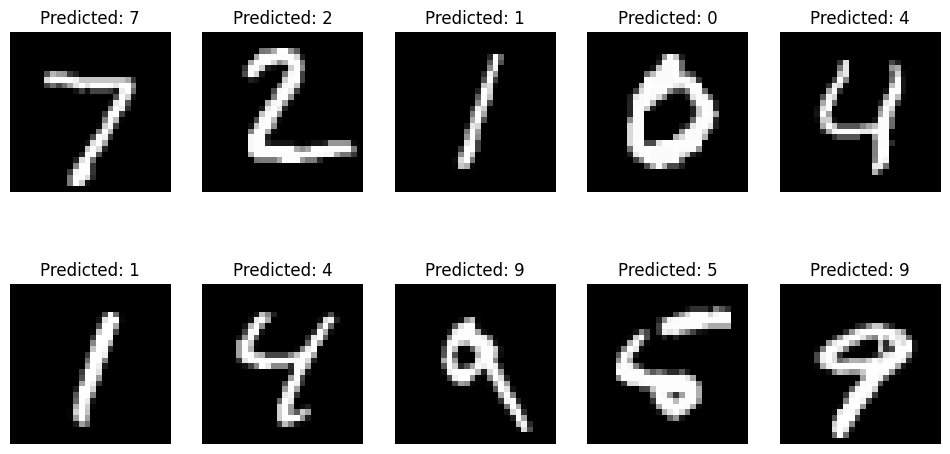

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

num_predictions = 10
print("Predictions with Images:")
plt.figure(figsize=(12, 6))
for i in range(num_predictions):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

**Prog - 9**

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

def adversarial_training(model, X_train, y_train, epochs=5):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=1024)
    return model

def tangent_propagation(model, X_train, y_train, epochs=5):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=1024)
    return model

def tangent_classifier(model, X_train, y_train, epochs=5):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=1024)
    return model

if __name__ == "__main__":
    model = build_model()

    print("Adversarial Training:")
    model_adv = adversarial_training(model, X_train, y_train)
    loss, accuracy = model_adv.evaluate(X_test, y_test)
    print(f"Accuracy on test set: {accuracy}")

    print("\nTangent Propagation:")
    model_tp = tangent_propagation(model, X_train, y_train)
    loss, accuracy = model_tp.evaluate(X_test, y_test)
    print(f"Accuracy on test set: {accuracy}")

    print("\nTangent Classifier:")
    model_tc = tangent_classifier(model, X_train, y_train)
    loss, accuracy = model_tc.evaluate(X_test, y_test)
    print(f"Accuracy on test set: {accuracy}")

Adversarial Training:
Epoch 1/5
59/59 [==============================] - 29s 475ms/step - loss: 0.5419 - accuracy: 0.8574
Epoch 2/5
59/59 [==============================] - 30s 515ms/step - loss: 0.1792 - accuracy: 0.9486
Epoch 3/5
59/59 [==============================] - 29s 500ms/step - loss: 0.1145 - accuracy: 0.9681
Epoch 4/5
59/59 [==============================] - 29s 489ms/step - loss: 0.0836 - accuracy: 0.9769
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0638 - accuracy: 0.9799
Accuracy on test set: 0.9799000024795532

Tangent Propagation:
Epoch 1/5
59/59 [==============================] - 31s 509ms/step - loss: 0.0628 - accuracy: 0.9819
Epoch 2/5
59/59 [==============================] - 28s 477ms/step - loss: 0.0495 - accuracy: 0.9867
Epoch 3/5
59/59 [==============================] - 28s 475ms/step - loss: 0.0424 - accuracy: 0.9882
Epoch 4/5
59/59 [==============================] - 28s 474ms/step - loss: 0.0359 - accuracy: 0.9904
Epoch 5/5
313/31

**Prog - 10**

In [10]:
import numpy as np
import tensorflow as tf

class SimpleRBM:
    def __init__(self, input_size, output_size):
        self.W = tf.Variable(tf.random.normal([input_size, output_size], 0.01))
        self.h_bias = tf.Variable(tf.zeros([output_size]))
        self.v_bias = tf.Variable(tf.zeros([input_size]))

    def sample(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random.uniform(tf.shape(probs))))

    def step(self, v):
        h_probs = tf.nn.sigmoid(tf.matmul(v, self.W) + self.h_bias)
        h_sample = self.sample(h_probs)
        v_probs = tf.nn.sigmoid(tf.matmul(h_sample, tf.transpose(self.W)) + self.v_bias)
        return h_sample, self.sample(v_probs)

    def train(self, data, epochs=10, lr=0.1):
        for epoch in range(epochs):
            for v in data:
                v = np.reshape(v, (1, -1))
                h_sample, v_sample = self.step(v)
                pos_grad = tf.matmul(tf.transpose(v), h_sample)
                neg_grad = tf.matmul(tf.transpose(v_sample), self.step(v_sample)[0])
                self.W.assign_add(lr * (pos_grad - neg_grad))
                self.v_bias.assign_add(lr * tf.reduce_mean(v - v_sample, axis=0))
                self.h_bias.assign_add(lr * tf.reduce_mean(h_sample - self.step(v_sample)[0], axis=0))

    def transform(self, data):
        data = np.reshape(data, (1, -1))
        return tf.nn.sigmoid(tf.matmul(data, self.W) + self.h_bias)

input_size, hidden_size_1, hidden_size_2, epochs, learning_rate = 6, 3, 2, 1000, 0.1

data = np.array([[1, 1, 1, 0, 0, 0],
                 [1, 0, 1, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0],
                 [0, 0, 1, 1, 1, 0],
                 [0, 0, 1, 1, 0, 0],
                 [0, 0, 1, 1, 1, 0]], dtype=np.float32)

rbm1 = SimpleRBM(input_size, hidden_size_1)
rbm1.train(data, epochs, learning_rate)
h1 = np.array([rbm1.transform(v) for v in data])

rbm2 = SimpleRBM(hidden_size_1, hidden_size_2)
rbm2.train(h1, epochs, learning_rate)
h2 = np.array([rbm2.transform(h) for h in h1])

print("Original Data:\n", data)
print("Features from RBM1:\n", h1)
print("Features from RBM2:\n", h2)

Original Data:
 [[1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0.]]
Features from RBM1:
 [[[2.4221163e-07 9.9997514e-01 6.7772032e-03]]

 [[8.9723297e-05 9.9994379e-01 2.7484629e-02]]

 [[2.4221163e-07 9.9997514e-01 6.7772032e-03]]

 [[9.9999893e-01 9.6573335e-01 9.8815930e-01]]

 [[9.9986035e-01 9.9580497e-01 9.7815943e-01]]

 [[9.9999893e-01 9.6573335e-01 9.8815930e-01]]]
Features from RBM2:
 [[[9.9069273e-01 9.9956924e-01]]

 [[9.9111593e-01 9.9949473e-01]]

 [[9.9069273e-01 9.9956924e-01]]

 [[9.9980134e-01 1.7410501e-04]]

 [[9.9981397e-01 2.1099630e-04]]

 [[9.9980134e-01 1.7410501e-04]]]
